In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

path='/content/drive/MyDrive/PNDB.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(path)

Mounted at /content/drive/


In [ ]:
# Displaying all the data
df.head(15)

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,Mutation,Yes,3.128268,No,5.585608,0
1,3,5.694742,Mutation,No,2.059342,No,3.141359,1
2,7,6.843595,No mutation,No,2.718667,Yes,4.639313,0
3,2,6.480186,No mutation,No,3.087017,No,6.217178,0
4,4,7.052861,Mutation,No,3.481472,No,3.368892,0
5,11,7.978628,No mutation,No,2.534249,No,3.869065,0
6,10,5.132685,No mutation,No,3.630459,No,4.398418,0
7,7,5.356342,No mutation,No,1.948910,No,6.508439,0
8,2,7.539731,No mutation,No,2.940289,No,6.746738,0
9,1,7.345458,No mutation,No,3.398348,Yes,6.347774,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [ ]:
df = Encoder(df)
df.head(15)

,Age,HbA1c,Genetic Info,Family History,Birth Weight,Developmental Delay,Insulin Level,PNDM
0,3,4.840927,0,1,3.128268,0,5.585608,0
1,3,5.694742,0,0,2.059342,0,3.141359,1
2,7,6.843595,1,0,2.718667,1,4.639313,0
3,2,6.480186,1,0,3.087017,0,6.217178,0
4,4,7.052861,0,0,3.481472,0,3.368892,0
5,11,7.978628,1,0,2.534249,0,3.869065,0
6,10,5.132685,1,0,3.630459,0,4.398418,0
7,7,5.356342,1,0,1.948910,0,6.508439,0
8,2,7.539731,1,0,2.940289,0,6.746738,0
9,1,7.345458,1,0,3.398348,1,6.347774,0


In [ ]:
# Set NaN in all columns where non-numeric values exist
df = df.apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values in 'PNDM' column
df = df.dropna(subset=['PNDM'])

In [ ]:
# Checking for Nan in all columns
for column_name, column_data in df.items():
    has_nan = df[column_name].isnull().values.any()
    print(has_nan, column_name)

False Age
False HbA1c
False Genetic Info
False Family History
False Birth Weight
False Developmental Delay
False Insulin Level
False PNDM


In [ ]:
# Compute the median for each column
median_values = df.median()

# Fill NaN values with the median
df.fillna(median_values, inplace=True)

# Checking for Nan in all columns
for column_name, column_data in df.items():
    has_nan = df[column_name].isnull().values.any()
    print(has_nan, column_name)

False Age
False HbA1c
False Genetic Info
False Family History
False Birth Weight
False Developmental Delay
False Insulin Level
False PNDM


<Axes: >

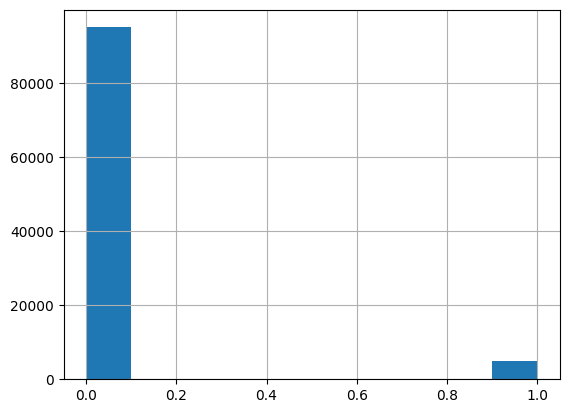

In [ ]:
df["PNDM"].hist()